<a href="https://colab.research.google.com/github/egagiilang/EgaGilangMahendra/blob/master/PROSES_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

In [3]:
import findspark
findspark.init("spark-3.0.0-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [4]:
!pip install -q pyspark_dist_explore

In [5]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

In [6]:
sc = spark.sparkContext
spark = SparkSession(sc)

In [7]:
WorldCupMatches_df = spark.read.csv("WorldCupMatches.csv", header=True, inferSchema=True)
WorldCupMatches_df.printSchema() 

root
 |-- Year: integer (nullable = true)
 |-- Datetime: string (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Stadium: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Home Team Name: string (nullable = true)
 |-- Home Team Goals: integer (nullable = true)
 |-- Away Team Goals: integer (nullable = true)
 |-- Away Team Name: string (nullable = true)
 |-- Win conditions: string (nullable = true)
 |-- Attendance: integer (nullable = true)
 |-- Half-time Home Goals: integer (nullable = true)
 |-- Half-time Away Goals: integer (nullable = true)
 |-- Referee: string (nullable = true)
 |-- Assistant 1: string (nullable = true)
 |-- Assistant 2: string (nullable = true)
 |-- RoundID: integer (nullable = true)
 |-- MatchID: integer (nullable = true)
 |-- Home Team Initials: string (nullable = true)
 |-- Away Team Initials: string (nullable = true)



In [8]:
print("Jumlah pertandingan yang terjadi :")
WorldCupMatches_df.count()

Jumlah pertandingan yang terjadi :


852

In [14]:
WorldCupMatches_df.select('Half-time Home Goals', 'Half-time Away Goals').describe().show()

+-------+--------------------+--------------------+
|summary|Half-time Home Goals|Half-time Away Goals|
+-------+--------------------+--------------------+
|  count|                 852|                 852|
|   mean|  0.7089201877934272|  0.4284037558685446|
| stddev|   0.937414128662808|  0.6912518906955025|
|    min|                   0|                   0|
|    max|                   6|                   5|
+-------+--------------------+--------------------+



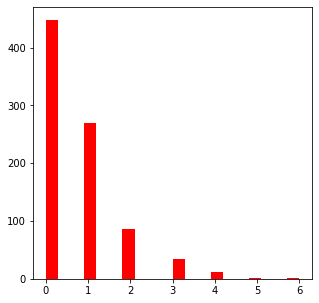

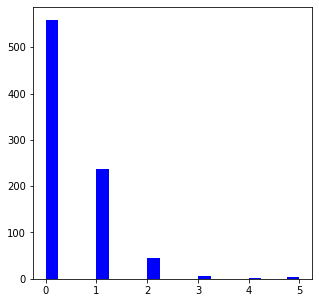

In [10]:
WorldCupMatches_df_halftimehome = WorldCupMatches_df.select('Half-time Home Goals')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, WorldCupMatches_df_halftimehome, bins=20, color="red",)

WorldCupMatches_df_halftimeaway = WorldCupMatches_df.select('Half-time Away Goals')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, WorldCupMatches_df_halftimeaway, bins=20, color="blue",)

plt.show()

In [11]:
print("Jumlah total goal home dengan kolom kosong(null):")
WorldCupMatches_df.where(col("Half-time Home Goals").isNull()).count()

print("Jumlah total goal away dengan kolom kosong(null):")
WorldCupMatches_df.where(col("Half-time Away Goals").isNull()).count()

Jumlah total goal home dengan kolom kosong(null):
Jumlah total goal away dengan kolom kosong(null):


0

In [12]:
mean_halftimehome = WorldCupMatches_df.agg(avg(col("Half-time Home Goals"))).first()
print("rata-rata goal di half-time(home) : ", mean_halftimehome[0])
WorldCupMatches_df = WorldCupMatches_df.na.fill(mean_halftimehome[0], ["Half-time Home Goals"])

mean_halftimeaway = WorldCupMatches_df.agg(avg(col("Half-time Away Goals"))).first()
print("rata-rata goal di half-time(away) : ", mean_halftimeaway[0])
WorldCupMatches_df = WorldCupMatches_df.na.fill(mean_halftimeaway[0], ["Half-time Away Goals"])

rata-rata goal di half-time(home) :  0.7089201877934272
rata-rata goal di half-time(away) :  0.4284037558685446


In [15]:
print("Jumlah total goal(home) dengan kolom kosong(null):")
WorldCupMatches_df.where(col("Half-time Home Goals").isNull()).count()

print("Jumlah total goal(away) dengan kolom kosong(null):")
WorldCupMatches_df.where(col("Half-time Away Goals").isNull()).count()

Jumlah total goal(home) dengan kolom kosong(null):
Jumlah total goal(away) dengan kolom kosong(null):


0

In [16]:
WorldCupMatches_df.select('Half-time Home Goals', 'Half-time Away Goals').describe().show()

+-------+--------------------+--------------------+
|summary|Half-time Home Goals|Half-time Away Goals|
+-------+--------------------+--------------------+
|  count|                 852|                 852|
|   mean|  0.7089201877934272|  0.4284037558685446|
| stddev|   0.937414128662808|  0.6912518906955025|
|    min|                   0|                   0|
|    max|                   6|                   5|
+-------+--------------------+--------------------+



In [17]:
WorldCupMatches_df.coalesce(1).write.csv("WorldCupMatches_processed", header=True)

In [18]:
spark.stop() 